In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbAgg')
from imageio import imread
from numpy.fft import fft2, ifft2
from aux import gkern

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Image Blur model
----------------------------------------
Observation model:

$f = h*g +n$

-$f$ is the observed image

-$h$ is the blur 'kernel'

-$g$ is the real image

-$n$ is noise

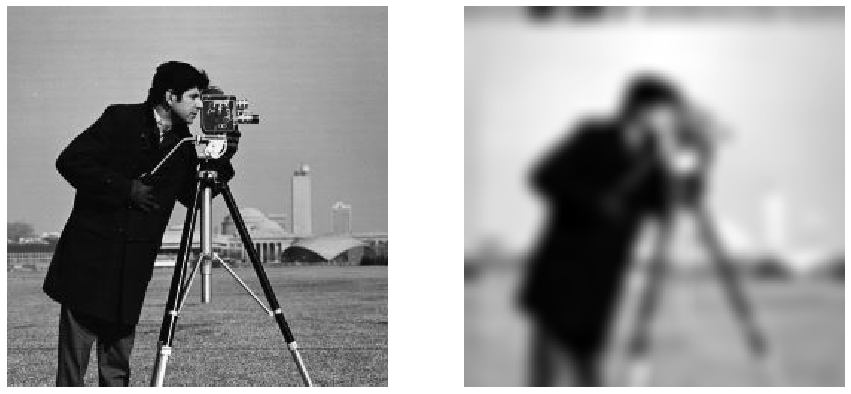

In [6]:
img_real = imread('cameraman.jpg').mean(-1)
img_real /= img_real.max()
kern = gkern(21,2)
img_obs = ifft2(fft2(img_real)*fft2(kern, img_real.shape)).real + 1e-15*np.random.randn(*img_real.shape)
# img_invfilt = ifft2(fft2(img_obs)/fft2(kern, img_obs.shape)).real

fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(img_real, cmap='gray')
ax[0].axis('off')
ax[1].imshow(img_obs, cmap='gray')
ax[1].axis('off')
plt.show()

Explicar Inverse Filtering

In [3]:
def g(x,y):
    kern = gkern(15,x)
    H = fft2(kern, img_real.shape)
    img_obs = ifft2(fft2(img_real)*H).real + (10**y)*np.random.randn(*img_real.shape)
    img_invfilt = ifft2(fft2(img_obs)/H).real
    
    fig, ax = plt.subplots(1, 2, figsize=(15,15))
    ax[0].imshow(img_obs, cmap='gray'), ax[0].axis('off')
    ax[1].imshow(img_invfilt, cmap='gray'), ax[0].axis('off')
    plt.show()

interactive_plot = interactive(g, x=widgets.IntSlider(min=1, max=5, step=1),
                               y=widgets.IntSlider(min=-9, max=-1, step=1, value=-9))
interactive_plot

interactive(children=(IntSlider(value=1, description='x', max=5, min=1), IntSlider(value=-9, description='y', …

Explicar Wiener Filtering

In [24]:
def g(Blur, Noise, K):
    kern = gkern(21,5-Blur)
    H = fft2(kern, img_real.shape)
    np.random.seed(234)
    img_obs = ifft2(fft2(img_real)*H).real + (10**Noise)*np.random.randn(*img_real.shape)
    X = fft2(img_obs)
    img_invfilt = ifft2(X/H).real
    G = H.T/(H*H.T+K)
    img_wnrfilt = ifft2(X*G).real
    
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    ax[0].imshow(img_obs, cmap='gray'), ax[0].axis('off')
    ax[1].imshow(img_invfilt, cmap='gray'), ax[0].axis('off')
    ax[2].imshow(img_wnrfilt, cmap='gray'), ax[0].axis('off')
    plt.show()

interactive_plot = interactive(g, Blur=fixed(3),
                               Noise=widgets.IntSlider(min=-9, max=-1, step=1, value=-9),
                               K=widgets.IntSlider(min=0, max=10, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=-9, description='Noise', max=-1, min=-9), IntSlider(value=0, description…

Estimar a PSD da imagem

In [20]:
def g(Blur, Noise):
    kern = gkern(21, 5-Blur)
    H = fft2(kern, img_real.shape)
    np.random.seed(234)
    noise = (10**Noise)*np.random.randn(*img_real.shape)
    SNR = np.abs(fft2(img_real))/(10**Noise)
    img_obs = ifft2(fft2(img_real)*H).real + noise
    X = fft2(img_obs)
    img_invfilt = ifft2(X/H).real
    G = H.T/(H*H.T+1/SNR)
    img_wnrfilt = ifft2(X*G).real
    
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    ax[0].imshow(img_obs, cmap='gray'), ax[0].axis('off')
#     ax[0].imshow(kern)
    ax[1].imshow(img_invfilt, cmap='gray'), ax[0].axis('off')
    ax[2].imshow(img_wnrfilt, cmap='gray'), ax[0].axis('off')
    plt.show()
    print(Blur)
    print(Noise)

interactive_plot = interactive(g, Blur=fixed(3),
                               Noise=widgets.IntSlider(min=-15, max=-1, step=1, value=-9))
interactive_plot

interactive(children=(IntSlider(value=-9, description='Noise', max=-1, min=-15), Output()), _dom_classes=('wid…